# Tiền xử lý dữ liệu

In [ ]:
# --- CELL 1: CÀI ĐẶT THƯ VIỆN ---
import os
import sys
import pandas as pd
import re

# 1. CẤU HÌNH ĐƯỜNG DẪN
folder_name = 'data_final'
work_dir = os.path.join('.', folder_name)

# Kiểm tra xem thư mục có tồn tại không
if not os.path.exists(work_dir):
    print(f"[WARNING] Chưa thấy thư mục '{folder_name}'. Đang tạo mới...")
    os.makedirs(work_dir)
    print(f"[INFO] Đã tạo thư mục '{folder_name}'. Hãy upload file dữ liệu vào trong thư mục này!")
else:
    print(f"[INFO] Đã tìm thấy thư mục: {work_dir}")

# 2. CÀI ĐẶT THƯ VIỆN
!pip install pyvi openpyxl pandas > /dev/null

import unicodedata
try:
    from pyvi import ViTokenizer
    print("[SUCCESS] Da import thanh cong thu vien PyVi.")
except ImportError:
    print("[ERROR] Loi cai dat PyVi. Vui long chay lai Cell nay.")

[INFO] Đã tìm thấy thư mục: ./data_final
[SUCCESS] Da import thanh cong thu vien PyVi.


In [ ]:
# --- CELL 2: TỰ ĐỘNG TẠO TỪ ĐIỂN VÀ THÊM BỘ LỌC ---

# 1. DANH SÁCH TỪ KHÓA RÁC
JUNK_KEYWORDS = [
    "còn hàng", "con hang", "hết hàng", "het hang", "về hàng", "ve hang",
    "có hàng", "co hang", "còn ko", "con ko", "còn k", "con k",
    "còn máy", "con may", "còn không", "con khong", "còn k ạ",
    "còn ở", "con o", "có ở", "co o", "chi nhánh", "cơ sở",
    "con hang", "con hong", "con kh", "con k", "còn hông",
    "hàn không", "han khong", "hàn k", "han k",
    "hà nội", "hcm", "hồ chí minh", "tphcm", "đà nẵng", "cần thơ", "hải phòng",
    "bến cát", "bình dương", "long an", "tây ninh", "lạng sơn", "bắc giang",
    "đồng nai", "biên hòa", "vũng tàu", "quận", "huyện", "tỉnh",
    "trả góp", "tra gop", "góp", "lãi suất", "trả trước", "duyệt hồ sơ",
    "ship", "giao hàng", "giao hang", "đặt hàng", "dat hang", "đặt cọc",
    "giá", "gia bao nhieu", "bao nhiêu", "nhieu", "triệu", "vnd", "đắt", "rẻ", "xin giá",
    "hủy", "bom hàng", "đổi trả", "bảo hành", "bấm nhầm",
    "tư vấn", "liên hệ", "sđt", "số điện thoại", "gọi", "alo", "zalo", "szalo",
    "check", "kiểm tra", "cho hỏi", "mình hỏi", "shop ơi", "ad ơi", "rep",
    "rep ib", "ib", "inbox",
    "nên mua", "so sánh", "hay là", "có sẵn", "tiếng việt không", "khe cắm"
]

# 2. TỪ ĐIỂN TEENCODE & CHÍNH TẢ
TEENCODE_DICT = {
    "ko": "không", "k": "không", "kh": "không", "khg": "không", "hok": "không", "hong": "không", "hông": "không", "hem": "không",
    "đc": "được", "dc": "được", "dk": "được", "ok": "tốt", "oke": "tốt", "oki": "tốt", "good": "tốt",
    "ak": "ạ", "ah": "ạ", "az": "ạ", "nhas": "nhé", "nha": "nhé",
    "sp": "sản_phẩm", "dt": "điện_thoại", "đt": "điện_thoại", "mobile": "điện_thoại",
    "nv": "nhân_viên", "shop": "cửa_hàng", "ad": "admin",
    "rep": "trả_lời", "ib": "nhắn_tin", "ship": "giao_hàng",
    "wed": "web", "frire": "fire", "hàn": "hàng"
}

# 3. TỰ ĐỘNG QUÉT TÊN SẢN PHẨM TỪ FILE DATA (Trong thư mục data_final)
CUSTOM_DICT = [
    "iphone 16 pro max", "iphone 16 pro", "iphone 16",
    "iphone 15 pro max", "iphone 15 pro", "iphone 15",
    "samsung galaxy", "xiaomi", "oppo", "vivo", "realme", "redmi",
    "nubia neo", "tecno spark", "infinix", "macbook", "ipad"
]

# Tìm file trong work_dir
data_files = [f for f in os.listdir(work_dir) if 'cellphones_reviews_final' in f and (f.endswith('.xlsx') or f.endswith('.csv'))]

if data_files:
    data_path = os.path.join(work_dir, data_files[0])
    try:
        print(f"[INFO] Dang quet ten san pham tu file: {data_files[0]}")
        if data_path.endswith('.csv'):
            df_temp = pd.read_csv(data_path)
        else:
            df_temp = pd.read_excel(data_path)

        if 'product' in df_temp.columns:
            raw_products = df_temp['product'].dropna().unique().tolist()
            for prod in raw_products:
                clean_name = str(prod).lower()
                clean_name = clean_name.replace("đánh giá", "").replace("chính hãng", "")
                clean_name = re.sub(r'\|\s*vn\/a', '', clean_name)
                clean_name = clean_name.split('-')[0].strip()
                if len(clean_name) > 3:
                    CUSTOM_DICT.append(clean_name)

            if 'brand' in df_temp.columns:
                brands = df_temp['brand'].dropna().unique().tolist()
                CUSTOM_DICT.extend([str(b).lower() for b in brands])

            print(f"[SUCCESS] Da them {len(CUSTOM_DICT)} tu vung san pham.")
    except Exception as e:
        print(f"[WARNING] Loi quet san pham: {e}")
else:
    print(f"[WARNING] Chua tim thay file du lieu trong thu muc '{work_dir}'.")

CUSTOM_DICT = sorted(list(set(CUSTOM_DICT)), key=len, reverse=True)

# 4. STOPWORDS
STOPWORDS = {
    "thì", "là", "mà", "bị", "của", "được", "có", "cho", "với", "về",
    "những", "các", "nhé", "nha", "ạ", "ơi", "này", "rồi", "thôi", "vậy",
    "em", "mình", "tôi", "bạn", "anh", "chị", "admin", "ad",
    "shop", "cellphones", "cửa_hàng", "mua", "dùng", "máy", "điện_thoại", "sản_phẩm"
}

print(f"[INFO] Da cau hinh xong Dictionary & Filter.")

[INFO] Dang quet ten san pham tu file: cellphones_reviews_final.xlsx
[SUCCESS] Da them 448 tu vung san pham.
[INFO] Da cau hinh xong Dictionary & Filter.


In [ ]:
# --- CELL 3: HÀM XỬ LÝ (PROCESS PIPELINE) ---

def is_junk_comment(text):
    if not text: return True
    text_lower = str(text).lower()
    if len(text_lower.split()) < 3: return True
    if text_lower.strip().endswith('?'): return True

    # Lọc tên người
    common_surnames = ["nguyen ", "nguyễn ", "tran ", "trần ", "le ", "lê ", "pham ", "phạm ", "hoang ", "hoàng "]
    if any(text_lower.startswith(name) for name in common_surnames) and len(text_lower.split()) <= 4:
        return True

    for keyword in JUNK_KEYWORDS:
        if keyword in text_lower:
            return True
    return False

def apply_custom_dict(text):
    for word in CUSTOM_DICT:
        if word in text:
            text = text.replace(word, word.replace(" ", "_"))
    return text

def process_text_pipeline(text):
    if not text or pd.isna(text): return ""
    text = str(text)
    text = unicodedata.normalize('NFC', text)
    text = re.sub(r'<[^>]*>', ' ', text)
    text = re.sub(r'https?://\S+', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [TEENCODE_DICT.get(t, t) for t in tokens]
    text = ' '.join(tokens)
    text = apply_custom_dict(text)
    try:
        text = ViTokenizer.tokenize(text)
    except: pass
    text = re.sub(r'[^\w\s_]', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in STOPWORDS]
    return ' '.join(tokens)

print("[INFO] Da dinh nghia xong ham xu ly.")

[INFO] Da dinh nghia xong ham xu ly.


In [ ]:
# --- CELL 4: ĐỌC DỮ LIỆU TỪ THƯ MỤC data_final ---

# Quét file trong thư mục work_dir (data_final)
data_files = [f for f in os.listdir(work_dir) if 'cellphones_reviews' in f and (f.endswith('.xlsx') or f.endswith('.csv'))]

if data_files:
    # Tạo đường dẫn đầy đủ: data_final/tên_file.xlsx
    input_path = os.path.join(work_dir, data_files[0])

    print(f"[INFO] Dang doc file: {input_path}")
    try:
        if input_path.endswith('.csv'):
            df = pd.read_csv(input_path)
        else:
            df = pd.read_excel(input_path)
        print(f"[SUCCESS] Doc file thanh cong! Tong so dong: {len(df)}")
    except Exception as e:
        print(f"[ERROR] Loi khi doc file: {e}")
else:
    print(f"[ERROR] KHONG TIM THAY FILE trong thu muc '{work_dir}'!")
    print("Hay chac chan ban da tao thu muc 'data_final' va upload file vao do.")

[INFO] Dang doc file: ./data_final/cellphones_reviews_final.xlsx
[SUCCESS] Doc file thanh cong! Tong so dong: 3472


In [ ]:
# --- CELL 5: CHẠY QUY TRÌNH TIỀN XỬ LÝ ---

if 'df' in locals():
    print("[INFO] Bat dau xu ly...")
    initial_len = len(df)

    if 'content' in df.columns:
        # 1. Lọc Admin
        df = df[~df['content'].str.contains('CellphoneS xin chào|CellphoneS', case=False, na=False)]

        # 2. Lọc rác
        print("[INFO] Dang loc bo cac cau hoi tu van, mua hang...")
        df = df[~df['content'].apply(is_junk_comment)]
        filtered_len = len(df)
        print(f"[INFO] Da loc bo {initial_len - filtered_len} dong rác/spam.")

        # 3. NLP
        print("[INFO] Dang chay chuan hoa NLP...")
        df['content_cleaned'] = df['content'].apply(process_text_pipeline)

        # 4. Lọc rỗng
        df_clean = df[df['content_cleaned'].str.strip().str.len() > 1].copy()
        final_len = len(df_clean)

        print(f"[SUCCESS] Hoan tat! So dong sach con lai: {final_len}")
    else:
        print("[ERROR] File du lieu khong co cot 'content'.")
else:
    print("[ERROR] Chua co du lieu de xu ly.")

[INFO] Bat dau xu ly...
[INFO] Dang loc bo cac cau hoi tu van, mua hang...
[INFO] Da loc bo 1414 dong rác/spam.
[INFO] Dang chay chuan hoa NLP...
[SUCCESS] Hoan tat! So dong sach con lai: 2057


In [ ]:
# --- CELL 6: LƯU KẾT QUẢ ---

if 'df_clean' in locals():
    print("\n--- KET QUA SAU KHI XU LY ---")
    print(df_clean[['content', 'content_cleaned']].sample(5))

    # Lưu vào trong folder data_final luon
    output_filename = 'data_preprocessed.xlsx'
    output_path = os.path.join(work_dir, output_filename)

    try:
        df_clean.to_excel(output_path, index=False)
        print(f"\n[SUCCESS] Da luu file tai: {output_path}")
    except Exception as e:
        print(f"[ERROR] Khong the luu file: {e}")


--- KET QUA SAU KHI XU LY ---
                                                content  \
1890  Em mua iPhone 16 thường màu xanh lưu ly 128g x...   
2399  ᵖᶜ 모 - 🖥️ \tϟ - ⚡︎ - ϟ \t×͜× - ×͡×ᶻ 𝗓 𐰁 .ᐟᯓᡣ𐭩𓇼...   
2827                  Game nào cũng chiến ngon, fps cao   
986   Mình mới mua em này lúc tối qua .. Công nhận c...   
854                                Cần có thêm quà tặng   

                                        content_cleaned  
1890  iphone_ thường màu xanh lưu_ly g xuống đời pro...  
2399                           ᵖᶜ 모 ϟ ϟ ᶻ 𝗓 𐰁 ᐟᯓᡣ𐭩𓇼 𓆝 𓇼  
2827                   game nào cũng chiến ngon fps cao  
986     mới lúc tối qua công_nhận chơi game cực_kỳ mạnh  
854                                   cần thêm quà tặng  

[SUCCESS] Da luu file tai: ./data_final/data_preprocessed.xlsx


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from wordcloud import WordCloud
from collections import Counter

# 1. LOAD DỮ LIỆU
if 'df_clean' not in locals():
    processed_path = os.path.join(work_dir, 'data_preprocessed.xlsx')
    raw_path = os.path.join(work_dir, 'cellphones_reviews_final.xlsx')

    if os.path.exists(processed_path):
        df_clean = pd.read_excel(processed_path)
        # Đảm bảo cột nội dung là chuỗi
        if 'content_cleaned' in df_clean.columns:
            df_clean['content_cleaned'] = df_clean['content_cleaned'].astype(str)
        print("[INFO] Đã load dữ liệu đã tiền xử lý.")
    elif os.path.exists(raw_path):
        df_clean = pd.read_excel(raw_path)
        print("[WARNING] Đã load dữ liệu gốc (chưa xử lý).")
    else:
        print("[ERROR] Không tìm thấy file dữ liệu nào!")

# 2. TẠO DANH SÁCH TỪ (Optimized)
if 'df_clean' in locals() and 'content_cleaned' in df_clean.columns:
    # Cách nhanh: Nối toàn bộ cột thành 1 chuỗi lớn rồi split (nhanh hơn vòng lặp for)
    all_words = " ".join(df_clean['content_cleaned']).split()
    print(f"Tổng số lượng từ vựng: {len(all_words)}")

Tổng số lượng từ vựng: 16861


## Thống kê phân bố theo thương hiệu

/tmp/ipython-input-2516692448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


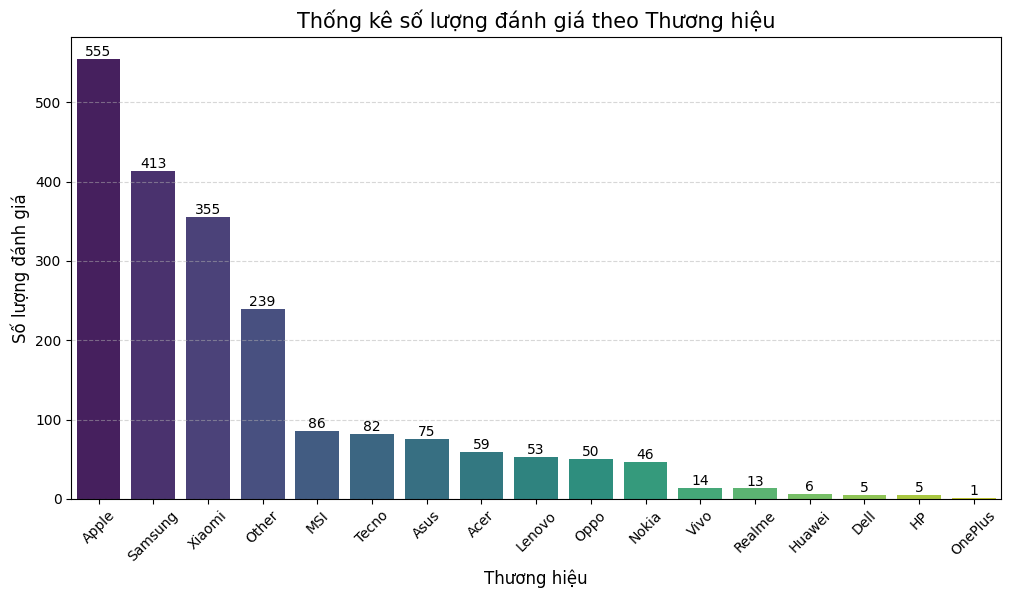

 NHẬN XÉT:
- Thương hiệu được quan tâm nhiều nhất: Apple (555 đánh giá)
- Tổng số thương hiệu có trong dữ liệu: 17


In [ ]:
# VẼ BIỂU ĐỒ THƯƠNG HIỆU
plt.figure(figsize=(12, 6))

# Đếm số lượng và sắp xếp từ cao xuống thấp
brand_counts = df_clean['brand'].value_counts()

# Vẽ Bar Chart
ax = sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')

plt.title('Thống kê số lượng đánh giá theo Thương hiệu', fontsize=15)
plt.xlabel('Thương hiệu', fontsize=12)
plt.ylabel('Số lượng đánh giá', fontsize=12)
plt.xticks(rotation=45) # Xoay tên hãng cho dễ đọc nếu quá dài

# Hiển thị con số cụ thể trên đầu mỗi cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print(" NHẬN XÉT:")
print(f"- Thương hiệu được quan tâm nhiều nhất: {brand_counts.index[0]} ({brand_counts.values[0]} đánh giá)")
print(f"- Tổng số thương hiệu có trong dữ liệu: {len(brand_counts)}")

## Thống kê phân bố Điểm đánh giá

/tmp/ipython-input-4188653739.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Reds')


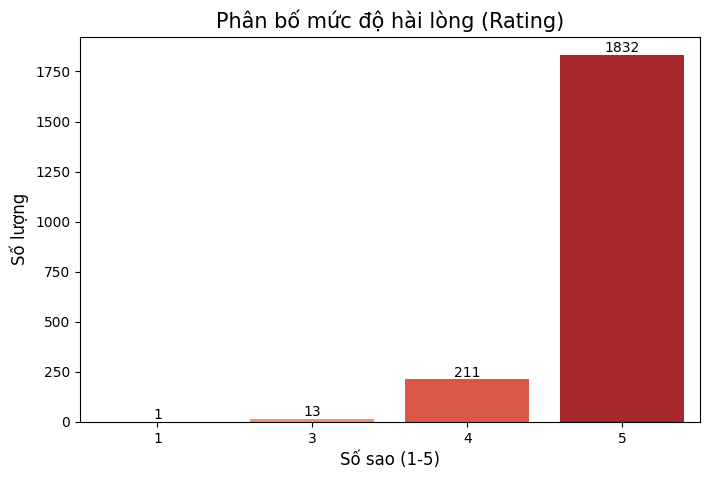

Tỷ lệ đánh giá 5 sao: 89.06%
CẢNH BÁO: Dữ liệu bị mất cân bằng nghiêm trọng (quá nhiều 5 sao).
   -> Mô hình phân loại cảm xúc có thể sẽ dự đoán toàn là 'Tích cực'.


In [ ]:
# VẼ BIỂU ĐỒ RATING (1-5 SAO)
plt.figure(figsize=(8, 5))

# Đếm số lượng từng mức sao
rating_counts = df_clean['rating'].value_counts().sort_index()

# Vẽ biểu đồ cột
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Reds')

plt.title('Phân bố mức độ hài lòng (Rating)', fontsize=15)
plt.xlabel('Số sao (1-5)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)

# Hiển thị số liệu
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Tính phần trăm
percent_5star = (len(df_clean[df_clean['rating']==5]) / len(df_clean)) * 100
print(f"Tỷ lệ đánh giá 5 sao: {percent_5star:.2f}%")
if percent_5star > 70:
    print("CẢNH BÁO: Dữ liệu bị mất cân bằng nghiêm trọng (quá nhiều 5 sao).")
    print("   -> Mô hình phân loại cảm xúc có thể sẽ dự đoán toàn là 'Tích cực'.")

## Thống kê độ dài bình luận

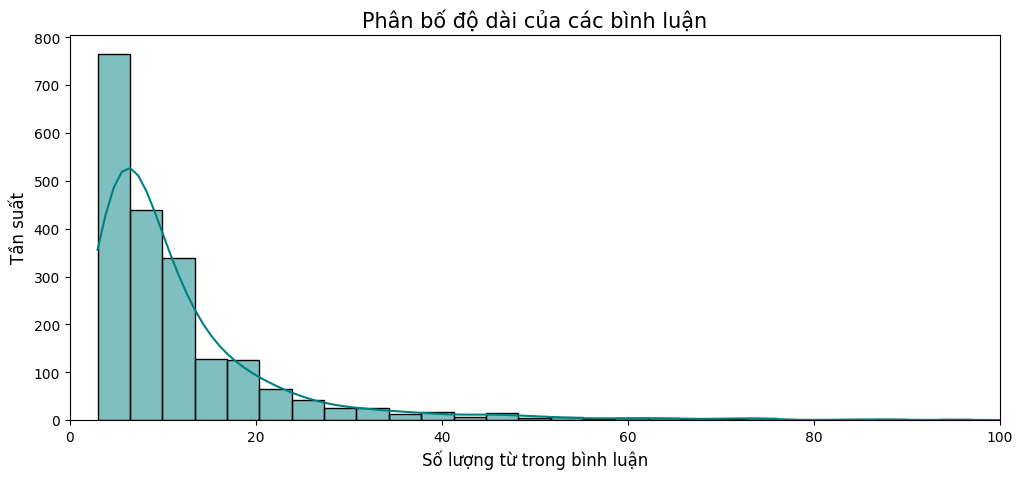

THỐNG KÊ ĐỘ DÀI:
- Trung bình: 12.1 từ/bình luận
- Ngắn nhất: 3 từ
- Dài nhất: 177 từ
- Đa số bình luận nằm trong khoảng 5-20 từ.


In [ ]:
# 1. TÍNH ĐỘ DÀI (SỐ TỪ)
# Chuyển nội dung về string để tránh lỗi
df_clean['content_str'] = df_clean['content'].astype(str)
# Đếm số từ (tách bằng khoảng trắng)
df_clean['word_count'] = df_clean['content_str'].apply(lambda x: len(x.split()))

# 2. VẼ BIỂU ĐỒ PHÂN BỐ (HISTOGRAM)
plt.figure(figsize=(12, 5))

# Vẽ Histogram kết hợp đường mật độ (KDE)
sns.histplot(df_clean['word_count'], bins=50, kde=True, color='teal')

plt.title('Phân bố độ dài của các bình luận', fontsize=15)
plt.xlabel('Số lượng từ trong bình luận', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xlim(0, 100) # Giới hạn hiển thị trục X đến 100 từ để nhìn cho rõ (vì có vài bài dài ngoằng làm biểu đồ bị xấu)

plt.show()

# 3. THỐNG KÊ CƠ BẢN
avg_len = df_clean['word_count'].mean()
max_len = df_clean['word_count'].max()
min_len = df_clean['word_count'].min()

print(f"THỐNG KÊ ĐỘ DÀI:")
print(f"- Trung bình: {avg_len:.1f} từ/bình luận")
print(f"- Ngắn nhất: {min_len} từ")
print(f"- Dài nhất: {max_len} từ")
print("- Đa số bình luận nằm trong khoảng 5-20 từ.")

## WORD FREQUENCY

/tmp/ipython-input-3222053386.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_freq, palette='viridis')


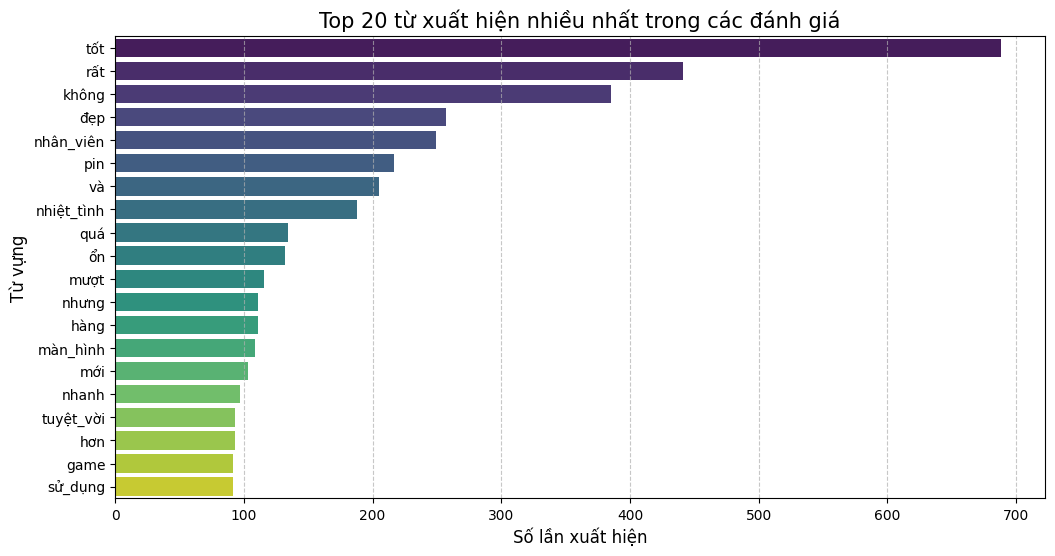

--- NHẬN XÉT SƠ BỘ ---
- Những từ nằm trên cùng là những vấn đề khách hàng quan tâm nhất (VD: pin, máy, màn_hình...).
- Nếu thấy các từ vô nghĩa (như: thì, là, mà...) xuất hiện nhiều, cần quay lại bước Tiền xử lý để bổ sung Stopwords.


In [ ]:
if 'all_words' in locals():
    # 1. Đếm số lần xuất hiện của từng từ
    word_counts = Counter(all_words)

    # 2. Lấy 20 từ xuất hiện nhiều nhất
    top_n = 20
    most_common_words = word_counts.most_common(top_n)

    # 3. Chuyển thành DataFrame để vẽ
    df_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

    # 4. Vẽ biểu đồ cột
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Word', data=df_freq, palette='viridis')
    plt.title(f'Top {top_n} từ xuất hiện nhiều nhất trong các đánh giá', fontsize=15)
    plt.xlabel('Số lần xuất hiện', fontsize=12)
    plt.ylabel('Từ vựng', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    print("--- NHẬN XÉT SƠ BỘ ---")
    print("- Những từ nằm trên cùng là những vấn đề khách hàng quan tâm nhất (VD: pin, máy, màn_hình...).")
    print("- Nếu thấy các từ vô nghĩa (như: thì, là, mà...) xuất hiện nhiều, cần quay lại bước Tiền xử lý để bổ sung Stopwords.")
else:
    print("[LỖI] Chưa tìm thấy biến 'all_words'. Hãy chạy đoạn code tạo danh sách từ ở trên trước!")

## WORDCLOUD TỔNG QUÁT

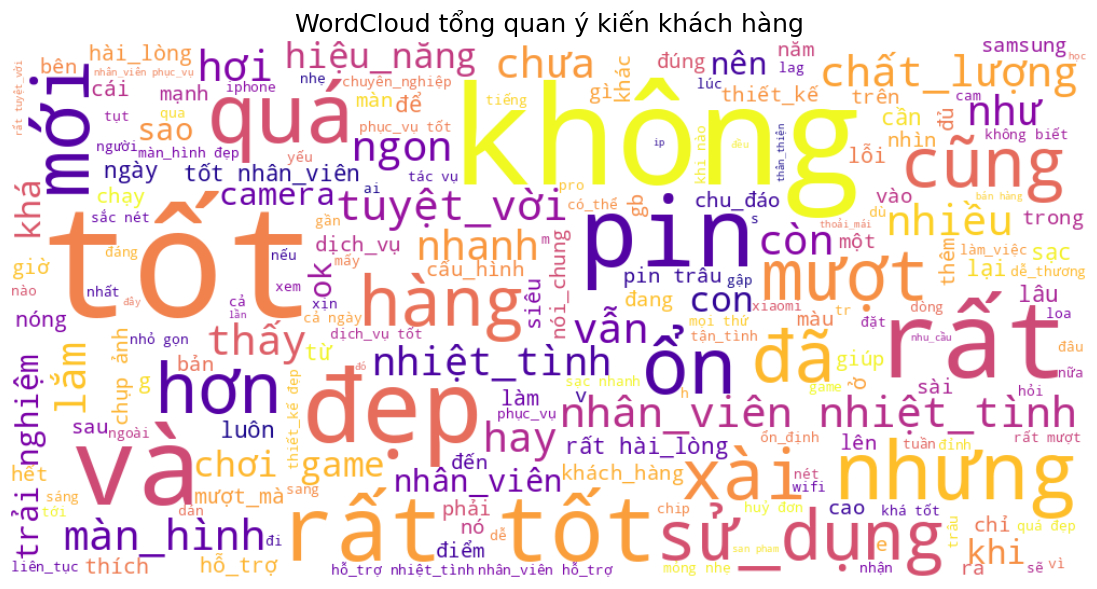

In [ ]:
# Kiểm tra xem biến df_clean đã tồn tại chưa
if 'df_clean' in locals():
    # 1. Nối lại thành một chuỗi văn bản dài
    # Chuyển về string để tránh lỗi nếu có dữ liệu không phải chuỗi
    text_corpus = " ".join(df_clean['content_cleaned'].astype(str))

    # 2. Tạo WordCloud
    wc = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        colormap='plasma',      # Chọn tông màu nóng
        max_words=200,          # Chỉ hiện 200 từ to nhất
        contour_width=3,
        contour_color='steelblue'
    ).generate(text_corpus)

    # 3. Hiển thị
    plt.figure(figsize=(14, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off') # Tắt trục tọa độ cho đẹp
    plt.title('WordCloud tổng quan ý kiến khách hàng', fontsize=18)
    plt.show()
else:
    print("[ERROR] Chưa có dữ liệu 'df_clean'. Hãy chạy các Cell trước đó (Tiền xử lý & EDA Cell 1) trước.")

CHIA CỤM VÀ GÁN NHÃN

In [ ]:
!pip install gensim > /dev/null
import pandas as pd
import numpy as np
import re
import os
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# 1. TỪ ĐIỂN TỪ KHÓA
TOPIC_DEFINITIONS = {
    "Pin & Sạc": ["pin", "sạc", "tụt", "trâu", "nhanh", "nóng", "mah", "hết", "onscreen", "day", "lâu", "yếu"],
    "Màn hình & Hiển thị": ["màn", "hình", "nét", "ám", "đẹp", "tần", "số", "quét", "120hz", "nhòe", "oled", "lcd", "hiển", "thị", "màu"],
    "Camera & Chụp ảnh": ["cam", "camera", "chụp", "ảnh", "nét", "video", "rung", "xấu", "mờ", "selfie", "pixel", "zoom"],
    "Hiệu năng & Game": ["game", "lag", "giật", "mượt", "chip", "nóng", "đơ", "treo", "liên", "quân", "fps", "snapdragon", "xử", "lý", "mạnh"],
    "Thiết kế & Ngoại hình": ["thiết", "kế", "mỏng", "nhẹ", "cầm", "màu", "lưng", "viền", "xước", "sang", "nhựa", "kính", "đẹp", "ngoại", "hình"],
    "Dịch vụ & CSKH": ["nhân", "viên", "tư", "vấn", "thái", "độ", "bảo", "hành", "giao", "shop", "phục", "vụ", "care", "hỗ", "trợ", "các em"],

    # NHÓM TỪ KHÓA TÀI CHÍNH
    "Giá cả & Khuyến mãi": [
        "giá", "rẻ", "đắt", "hợp", "lý", "tiền", "giảm", "khuyến", "mãi", "sale", "thu", "cũ",
        "thu nhập", "túi tiền", "kinh tế", "lương", "chi phí", "mắc", "tầm giá", "ví"
    ]
}

# 2. XỬ LÝ DỮ LIỆU
if 'work_dir' not in globals(): work_dir = '.'
INPUT_FILE = os.path.join(work_dir, 'data_preprocessed.xlsx') # Sử dụng file đã tiền xử lý
OUTPUT_FILE = 'data_final_chinh_xac_100.csv'

# Load Data
try:
    if INPUT_FILE.endswith('.csv'): df = pd.read_csv(INPUT_FILE)
    else: df = pd.read_excel(INPUT_FILE)
except:
    df = pd.read_csv(INPUT_FILE, encoding='utf-16', sep='\t')

if not df.empty:
    col_text = next((c for c in df.columns if 'content_cleaned' in c.lower() or 'content' in c.lower() or 'comment' in c.lower()), 'content_cleaned')

    # BƯỚC 1: WORD2VEC + K-MEANS (ĐỂ LẤY NHÃN CHO CÂU KHÔNG TỪ KHÓA)
    def simple_tokenize(text):
        if not isinstance(text, str): return []
        text = text.lower()
        text = re.sub(r'[\W_]+', ' ', text) # Sửa regex để giữ các từ đã nối bằng gạch dưới
        return text.split()

    sentences = df[col_text].apply(simple_tokenize).tolist()

    print("Training Word2Vec...")
    w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4, seed=42)

    def get_vec(tokens):
        vecs = [w2v_model.wv[w] for w in tokens if w in w2v_model.wv]
        return np.mean(vecs, axis=0) if vecs else np.zeros(100)

    X_vecs = np.array([get_vec(s) for s in sentences])

    print("Clustering...")
    kmeans = KMeans(n_clusters=14, init='k-means++', random_state=42, n_init=10).fit(X_vecs) # Thêm n_init

    # Mapping sơ bộ cho cụm (để dùng khi không có từ khóa nào)
    cluster_labels_base = {}
    for i in range(14):
        center = kmeans.cluster_centers_[i]
        sim_words = [w[0] for w in w2v_model.wv.most_similar([center], topn=10)]
        # Map đơn giản
        best = "Đánh giá chung"
        for t, kws in TOPIC_DEFINITIONS.items():
            if any(w in kws for w in sim_words): best = t; break
        cluster_labels_base[i] = best

    df['Cluster_Base'] = kmeans.labels_

    # BƯỚC 2: LOGIC "BÀN TAY SẮT" (STRICT LOGIC)
    print("Đang áp dụng logic kiểm duyệt nghiêm ngặt...")

    def get_final_label(row):
        text = str(row[col_text]).lower()

        # 1. Đếm số lần xuất hiện từ khóa của mỗi chủ đề
        topic_scores = {t: 0 for t in TOPIC_DEFINITIONS}
        found_any = False

        for topic, kws in TOPIC_DEFINITIONS.items():
            for kw in kws:
                if kw in text:
                    # Đếm số lần xuất hiện của từ khóa này trong câu
                    count = text.count(kw)
                    topic_scores[topic] += count
                    found_any = True

        if found_any:
            # Tìm chủ đề có điểm cao nhất
            # Nếu bằng điểm nhau (VD: Pin 1 lần, Cam 1 lần), hàm max sẽ lấy cái xuất hiện trước trong dict
            best_topic = max(topic_scores, key=topic_scores.get)
            return best_topic
        else:
            # 3. KHÔNG CÓ TỪ KHÓA -> MỚI TIN VÀO K-MEANS
            cluster_id = row['Cluster_Base']
            return cluster_labels_base.get(cluster_id, "Đánh giá chung")

    df['Topic_Label_Final'] = df.apply(get_final_label, axis=1)

    # KIỂM TRA LẠI CÂU CỦA BẠN
    check_kws = ["thu nhập", "tầm giá", "ví tiền"]
    print("\n--- KIỂM TRA LẠI CÁC CÂU VỀ TÀI CHÍNH ---")
    for kw in check_kws:
        sample = df[df[col_text].str.contains(kw, case=False, na=False)].head(1)
        if not sample.empty:
            print(f"- Có từ '{kw}' -> Nhãn: {sample.iloc[0]['Topic_Label_Final']}")
            print(f"  Nội dung: {sample.iloc[0][col_text][:60]}...")

    df.to_csv(OUTPUT_FILE, index=False, encoding='utf-8-sig')
    print(f"\nXONG. File chuẩn: {OUTPUT_FILE}")

else:
    print("No data.")

Training Word2Vec...
Clustering...
Đang áp dụng logic kiểm duyệt nghiêm ngặt...

--- KIỂM TRA LẠI CÁC CÂU VỀ TÀI CHÍNH ---
- Có từ 'thu nhập' -> Nhãn: Giá cả & Khuyến mãi
  Nội dung: tôi thấy rất phù hợp với những người có thu nhập trung bình...

XONG. File chuẩn: data_final_chinh_xac_100.csv


WORDCLOUD CỦA CÁC CỤM

=== TẠO WORDCLOUD ===
1. Đang tạo WordCloud tổng quan...


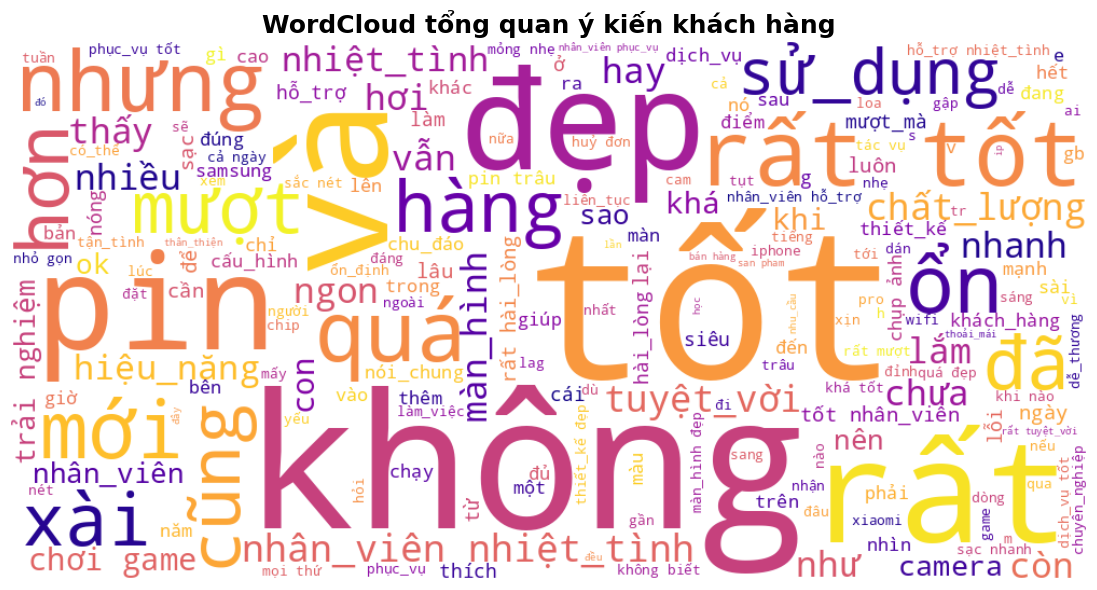


2. Đang tạo WordCloud chi tiết cho từng nhóm chủ đề...


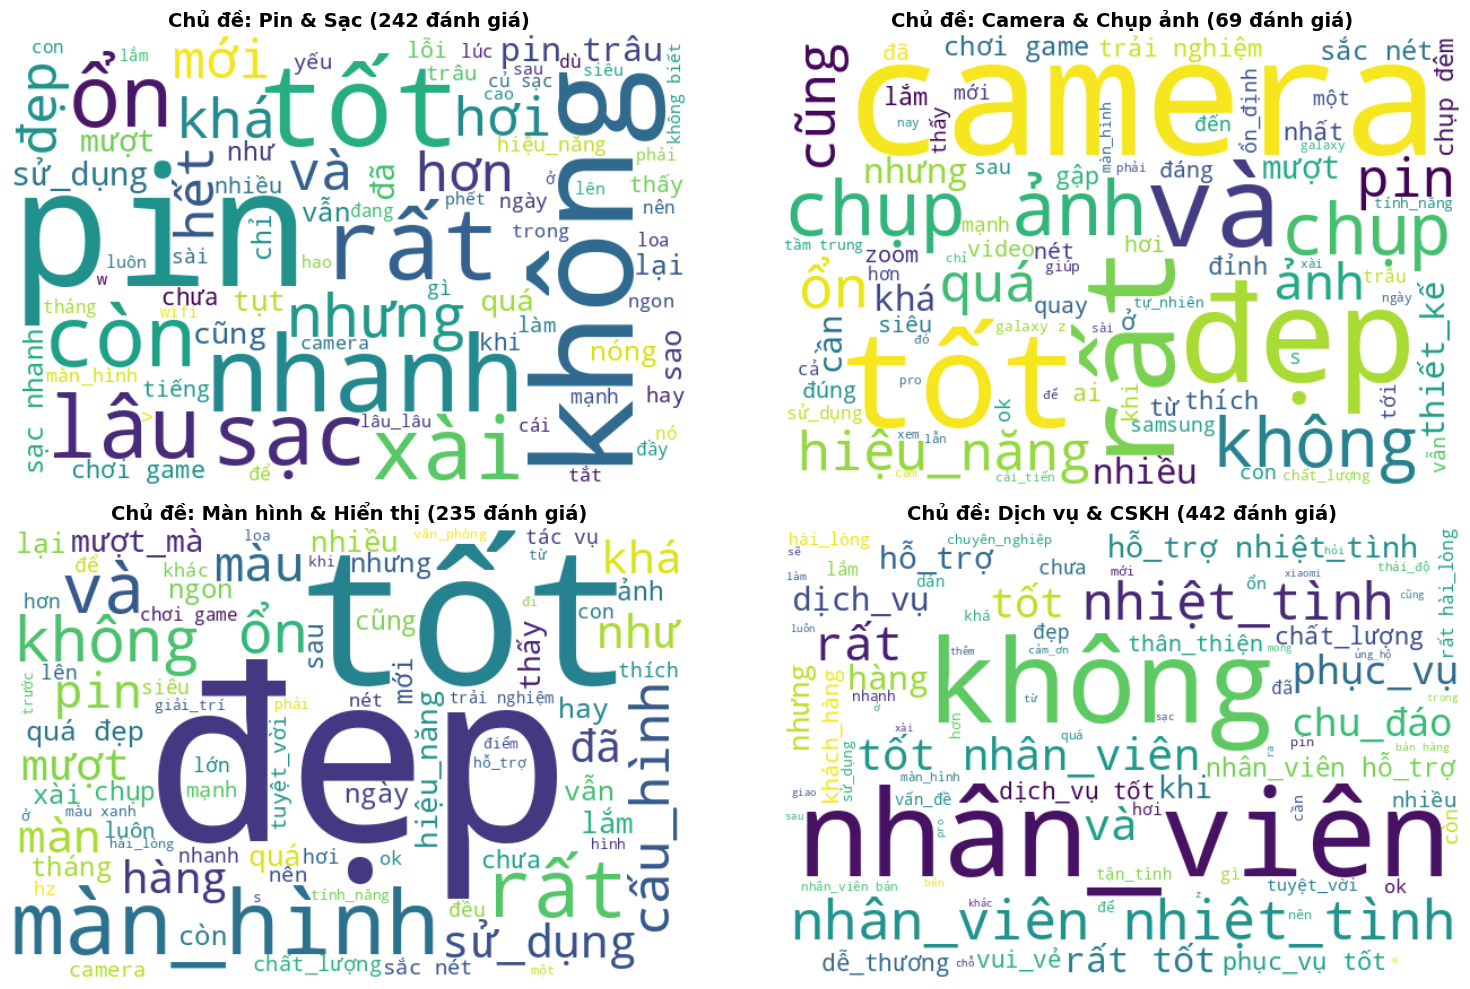

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- 1. LOAD DỮ LIỆU ---
# Đảm bảo biến df đã được load
if 'df' not in locals():
    file_path = 'data_final_chinh_xac_100.csv'
    try:
        df = pd.read_csv(file_path)
    except:
        df = pd.read_excel(file_path)

# Đảm bảo dữ liệu là chuỗi
df['content_cleaned'] = df['content_cleaned'].astype(str)

print("=== TẠO WORDCLOUD ===")

# --- 2. TẠO WORDCLOUD TỔNG QUAN ---
print("1. Đang tạo WordCloud tổng quan...")
text_corpus = " ".join(df['content_cleaned'])

wc = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='plasma',      # Tông màu nóng
    max_words=200,          # 200 từ nổi bật nhất
    contour_width=3,
    contour_color='steelblue'
).generate(text_corpus)

plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud tổng quan ý kiến khách hàng', fontsize=18, fontweight='bold')
plt.show()

# --- 3. TẠO WORDCLOUD CHO TỪNG CỤM CHỦ ĐỀ (Data Phân Cụm) ---
print("\n2. Đang tạo WordCloud chi tiết cho từng nhóm chủ đề...")

# Danh sách các chủ đề quan trọng cần soi kỹ
target_topics = ["Pin & Sạc", "Camera & Chụp ảnh", "Màn hình & Hiển thị", "Dịch vụ & CSKH"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, topic in enumerate(target_topics):
    # Lọc các dòng thuộc chủ đề này
    subset = df[df['Topic_Label_Final'].str.contains(topic, case=False, na=False)]
    text_topic = " ".join(subset['content_cleaned'])

    if len(text_topic.strip()) > 0:
        wc_topic = WordCloud(
            width=600, height=400,
            background_color='white',
            colormap='viridis', # Tông màu khác để phân biệt
            max_words=80
        ).generate(text_topic)

        axes[i].imshow(wc_topic, interpolation='bilinear')
        axes[i].set_title(f'Chủ đề: {topic} ({len(subset)} đánh giá)', fontsize=14, fontweight='bold')
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, "Không có dữ liệu", ha='center', fontsize=12)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

ĐÁNH GIÁ TRỌNG SỐ

In [ ]:
import pandas as pd
import numpy as np
import os
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

# --- CẤU HÌNH ---
if 'work_dir' not in locals(): work_dir = '.'
INPUT_FILE = 'data_final_chinh_xac_100.csv'
MODEL_OUTPUT = os.path.join(work_dir, 'word2vec.model')
VECTOR_OUTPUT = os.path.join(work_dir, 'X_word2vec_weighted.npy')

print("=== BẮT ĐẦU QUY TRÌNH VECTOR HÓA LẠI TỪ ĐẦU ===")

# 1. LOAD DỮ LIỆU
if os.path.exists(INPUT_FILE):
    df = pd.read_csv(INPUT_FILE)
    # Đảm bảo cột content_cleaned là chuỗi và không rỗng
    df['content_cleaned'] = df['content_cleaned'].astype(str).fillna('')
    # Lọc bỏ các dòng quá ngắn (dưới 2 từ) để tránh nhiễu
    df = df[df['content_cleaned'].apply(lambda x: len(x.split()) > 1)].reset_index(drop=True)

    texts = df['content_cleaned'].tolist()
    print(f"[INFO] Đã load {len(texts)} dòng dữ liệu sạch.")
else:
    print(f"[ERROR] Không tìm thấy file {INPUT_FILE}")
    texts = []

if texts:
    # 2. TRAIN LẠI WORD2VEC
    print("[INFO] Đang chuẩn bị dữ liệu train Word2Vec...")
    sentences = [t.split() for t in texts]

    print(f"   -> Mẫu câu đầu tiên: {sentences[0]}")

    print("[INFO] Đang train lại Word2Vec (Epochs=30, Min_count=1)...")
    # Tăng epochs lên 30 để mô hình học kỹ hơn
    # sg=1 (Skip-gram) thường tốt hơn cho dữ liệu ít
    w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, epochs=30, sg=1, seed=42)
    w2v_model.save(MODEL_OUTPUT)
    print("[SUCCESS] Đã train và lưu word2vec.model mới.")

    # 3. TÍNH TF-IDF WEIGHTS
    print("[INFO] Đang tính trọng số TF-IDF...")
    tfidf = TfidfVectorizer()
    tfidf.fit(texts)
    # Tạo từ điển {từ: trọng_số_idf}
    word2weight = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

    # 4. TẠO VECTOR TRUNG BÌNH CÓ TRỌNG SỐ (WEIGHTED AVERAGE)
    print("[INFO] Đang tạo ma trận vector...")
    X_weighted = []
    dim = w2v_model.vector_size

    for text in texts:
        words = text.split()
        vecs = []
        weights = []

        for w in words:
            if w in w2v_model.wv and w in word2weight:
                vecs.append(w2v_model.wv[w])
                weights.append(word2weight[w])

        if len(vecs) > 0:
            # Công thức: Tổng(Vector * Trọng_số) / Tổng(Trọng_số)
            weighted_avg = np.average(vecs, axis=0, weights=weights)
            X_weighted.append(weighted_avg)
        else:
            X_weighted.append(np.zeros(dim))

    X_weighted = np.array(X_weighted)

    # 5. KIỂM TRA CHẤT LƯỢNG
    variance = np.std(X_weighted)
    print("-" * 30)
    print(f"KẾT QUẢ KIỂM TRA:")
    print(f"   - Kích thước ma trận: {X_weighted.shape}")
    print(f"   - Độ lệch chuẩn (Variance): {variance:.6f}")

    if variance < 0.001:
        print("LỖI NGHIÊM TRỌNG: Các vector vẫn giống hệt nhau. Hãy kiểm tra lại dữ liệu đầu vào!")
    else:
        print("THÀNH CÔNG: Các vector đã có sự phân hóa tốt.")
        np.save(VECTOR_OUTPUT, X_weighted)
        print(f"[DONE] Đã lưu file vector chuẩn tại: {VECTOR_OUTPUT}")

        # Lưu lại file data tương ứng để đảm bảo đồng bộ index
        df.to_csv('data_final_chinh_xac_100.csv', index=False)
        print("[INFO] Đã lưu file data đồng bộ: data_final_chinh_xac_100.csv")

else:
    print("[ERROR] Không có dữ liệu để chạy.")

=== BẮT ĐẦU QUY TRÌNH VECTOR HÓA LẠI TỪ ĐẦU ===
[INFO] Đã load 2015 dòng dữ liệu sạch.
[INFO] Đang chuẩn bị dữ liệu train Word2Vec...
   -> Mẫu câu đầu tiên: ['nhân_viên', 'đỉnh', 'và', 'tốt', 'đáng', 'đồng_tiền', 'bát', 'gạo', 'lt']
[INFO] Đang train lại Word2Vec (Epochs=30, Min_count=1)...
[SUCCESS] Đã train và lưu word2vec.model mới.
[INFO] Đang tính trọng số TF-IDF...
[INFO] Đang tạo ma trận vector...
------------------------------
KẾT QUẢ KIỂM TRA:
   - Kích thước ma trận: (2015, 100)
   - Độ lệch chuẩn (Variance): 0.212050
THÀNH CÔNG: Các vector đã có sự phân hóa tốt.
[DONE] Đã lưu file vector chuẩn tại: ./data_final/X_word2vec_weighted.npy
[INFO] Đã lưu file data đồng bộ: data_final_chinh_xac_100.csv


=== BẮT ĐẦU ĐÁNH GIÁ CHẤT LƯỢNG & PHÂN TÍCH ĐỐI SÁNH ===
1. Đang đọc dữ liệu từ: data_final_chinh_xac_100.csv
   -> Đã load 2015 dòng dữ liệu.
2. Đang đọc vector từ: ./data_final/X_word2vec_weighted.npy
   -> Đã load ma trận vector kích thước: (2015, 100)

4.3. KẾT QUẢ ĐÁNH GIÁ CHẤT LƯỢNG PHÂN CỤM
CHỦ ĐỀ                    | SỐ LƯỢNG   | ĐỘ NÉN (Thấp=Tốt)   
------------------------------------------------------------
Pin & Sạc                 | 242        | 0.1233
Màn hình & Hiển thị       | 235        | 0.1421
Camera & Chụp ảnh         | 69         | 0.1125
Hiệu năng & Game          | 164        | 0.1801
Thiết kế & Ngoại hình     | 108        | 0.1200
Dịch vụ & CSKH            | 440        | 0.1471
Giá cả & Khuyến mãi       | 68         | 0.1741
------------------------------------------------------------
ĐỘ NÉN TRUNG BÌNH (Compactness): 0.1428
ĐỘ TÁCH BIỆT TRUNG BÌNH (Separation): 0.1015 (Cao là tốt)

4.4. PHÂN TÍCH ĐỐI SÁNH: LOẠI SẢN PHẨM vs CHỦ ĐỀ
   (Phân tích dựa trên cột: 'cate

Topic,Pin & Sạc,Màn hình & Hiển thị,Camera & Chụp ảnh,Hiệu năng & Game,Thiết kế & Ngoại hình,Dịch vụ & CSKH,Giá cả & Khuyến mãi
category,,,,,,,
Laptop,15.15,22.08,1.73,18.61,10.82,28.14,3.46
Mobile,19.82,16.36,6.50,10.87,7.32,33.94,5.18
Tablet,10.81,20.72,0.90,12.61,9.91,36.94,8.11


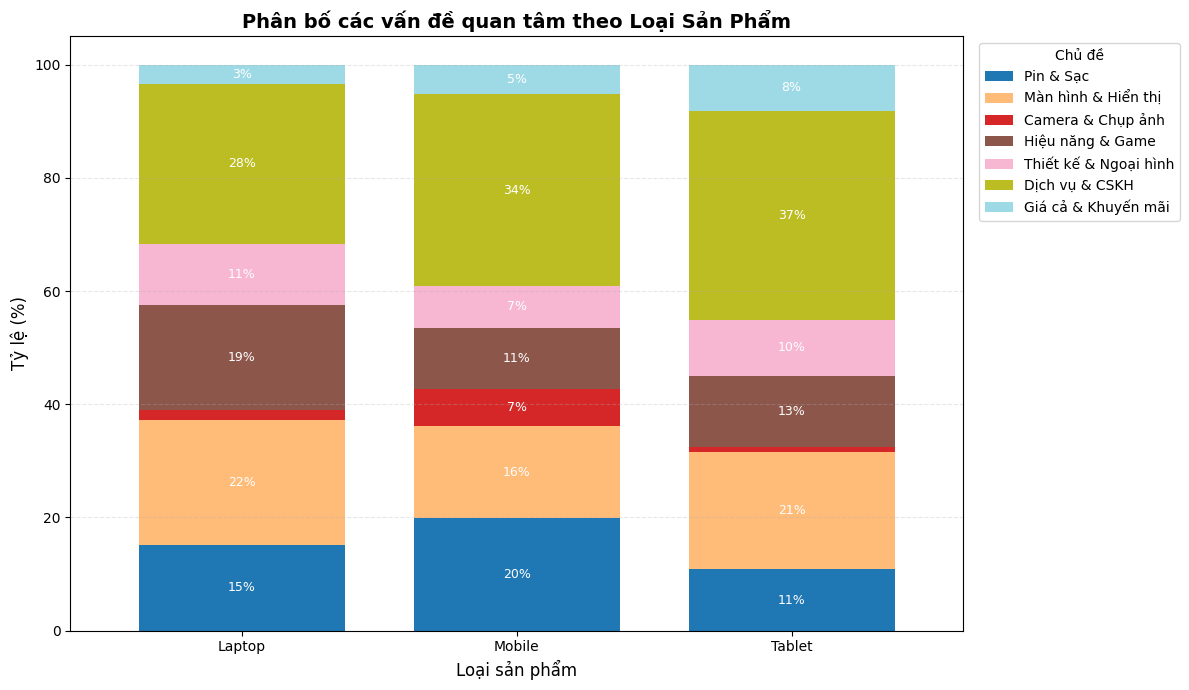

Hoàn tất phân tích.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_distances

print("=== BẮT ĐẦU ĐÁNH GIÁ CHẤT LƯỢNG & PHÂN TÍCH ĐỐI SÁNH ===")

# 1. LOAD DỮ LIỆU & VECTOR
DATA_FILE = 'data_final_chinh_xac_100.csv'
VECTOR_FILE = os.path.join(work_dir, 'X_word2vec_weighted.npy')

print(f"1. Đang đọc dữ liệu từ: {DATA_FILE}")
try:
    # Thử đọc CSV hoặc Excel
    if DATA_FILE.endswith('.csv'):
        df = pd.read_csv(DATA_FILE)
    else:
        df = pd.read_excel(DATA_FILE)
    print(f"   -> Đã load {len(df)} dòng dữ liệu.")
except Exception as e:
    print(f"Lỗi đọc file data: {e}")
    df = pd.DataFrame()

print(f"2. Đang đọc vector từ: {VECTOR_FILE}")
try:
    X_features = np.load(VECTOR_FILE)
    print(f"   -> Đã load ma trận vector kích thước: {X_features.shape}")
except Exception as e:
    print(f"Lỗi đọc file vector: {e}")
    X_features = np.array([])

# Kiểm tra tính đồng bộ
if len(df) != len(X_features):
    print(f"CẢNH BÁO: Số dòng Data ({len(df)}) và Vector ({len(X_features)}) không khớp.")
    min_len = min(len(df), len(X_features))
    df = df.iloc[:min_len]
    X_features = X_features[:min_len]
    print(f"   -> Đã tự động cắt còn {min_len} dòng để khớp.")

# 2. ĐÁNH GIÁ ĐỘ NÉN (COMPACTNESS) & TÁCH BIỆT (SEPARATION)
print("\n4.3. KẾT QUẢ ĐÁNH GIÁ CHẤT LƯỢNG PHÂN CỤM")

# Danh sách chủ đề cần đánh giá (để lọc bỏ các nhãn rác nếu có)
TARGET_TOPICS = [
    "Pin & Sạc", "Màn hình & Hiển thị", "Camera & Chụp ảnh",
    "Hiệu năng & Game", "Thiết kế & Ngoại hình",
    "Dịch vụ & CSKH", "Giá cả & Khuyến mãi"
]

if 'Topic_Label_Final' in df.columns:
    # Explode vì một comment có thể có nhiều nhãn (VD: "Pin & Sạc, Camera")
    # Chúng ta cần tách ra để tính toán cho từng nhóm chủ đề riêng biệt
    # Lưu ý: Index của df_exploded sẽ bị trùng lặp, cần giữ index gốc để map với vector
    df_exploded = df.assign(original_index=df.index, Topic=df['Topic_Label_Final'].str.split(', ')).explode('Topic')

    valid_centers = []
    total_compactness = 0
    count_topics = 0

    print(f"{'CHỦ ĐỀ':<25} | {'SỐ LƯỢNG':<10} | {'ĐỘ NÉN (Thấp=Tốt)':<20}")
    print("-" * 60)

    for topic in TARGET_TOPICS:
        # Lấy các dòng thuộc chủ đề này
        subset = df_exploded[df_exploded['Topic'] == topic]

        # Lấy index gốc để truy xuất vector tương ứng
        original_indices = subset['original_index'].values

        if len(original_indices) > 5:
            # Lấy vector
            vecs = X_features[original_indices]

            # Lọc bỏ vector toàn số 0 (nếu có) để không làm sai lệch kết quả
            valid_mask = ~np.all(vecs == 0, axis=1)
            vecs = vecs[valid_mask]

            if len(vecs) > 0:
                # Tính tâm cụm (Centroid)
                centroid = np.mean(vecs, axis=0).reshape(1, -1)

                # Tính độ nén (Trung bình khoảng cách từ điểm đến tâm)
                dist = np.mean(cosine_distances(vecs, centroid))

                print(f"{topic:<25} | {len(original_indices):<10} | {dist:.4f}")

                valid_centers.append(centroid[0])
                total_compactness += dist
                count_topics += 1

    print("-" * 60)
    if count_topics > 0:
        print(f"ĐỘ NÉN TRUNG BÌNH (Compactness): {total_compactness/count_topics:.4f}")

        # Tính độ tách biệt (Separation) - Khoảng cách giữa các tâm cụm
        if len(valid_centers) > 1:
            center_matrix = np.array(valid_centers)
            sep_dists = cosine_distances(center_matrix)
            # Lấy tam giác trên của ma trận khoảng cách (bỏ đường chéo 0)
            upper_indices = np.triu_indices(len(center_matrix), k=1)
            avg_separation = np.mean(sep_dists[upper_indices])
            print(f"ĐỘ TÁCH BIỆT TRUNG BÌNH (Separation): {avg_separation:.4f} (Cao là tốt)")
else:
    print("Không tìm thấy cột 'Topic_Label_Final'. Hãy kiểm tra lại file dữ liệu.")

# 3. PHÂN TÍCH ĐỐI SÁNH (Comparative Analysis)
print("\n4.4. PHÂN TÍCH ĐỐI SÁNH: LOẠI SẢN PHẨM vs CHỦ ĐỀ")

# Tự động tìm cột loại sản phẩm (Category)
col_prod = next((c for c in ['category', 'Product_Type', 'nhóm', 'loại'] if c in df.columns), None)

if col_prod and 'Topic_Label_Final' in df.columns:
    print(f"   (Phân tích dựa trên cột: '{col_prod}')")

    # Lọc bỏ 'Đánh giá chung' để biểu đồ tập trung vào vấn đề cụ thể
    df_chart = df_exploded[df_exploded['Topic'].isin(TARGET_TOPICS)]

    # Tạo bảng chéo % (Tính % theo hàng - tức là theo từng loại sản phẩm)
    cross_tab = pd.crosstab(df_chart[col_prod], df_chart['Topic'], normalize='index') * 100

    # Sắp xếp cột theo thứ tự mong muốn
    available_cols = [c for c in TARGET_TOPICS if c in cross_tab.columns]
    cross_tab = cross_tab[available_cols]

    # Hiển thị bảng số liệu
    print("\nBảng tỷ lệ phần trăm mối quan tâm (%):")
    display(cross_tab.round(2))

    # Vẽ biểu đồ Stacked Bar Chart
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20', width=0.75)

    plt.title('Phân bố các vấn đề quan tâm theo Loại Sản Phẩm', fontsize=14, fontweight='bold')
    plt.ylabel('Tỷ lệ (%)', fontsize=12)
    plt.xlabel('Loại sản phẩm', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="Chủ đề")
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()

    # Hiển thị số % lên biểu đồ (chỉ hiện nếu > 3% cho đỡ rối)
    for c in ax.containers:
        labels = [f'{v.get_height():.0f}%' if v.get_height() > 3 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=9, color='white')

    plt.show()

    print("Hoàn tất phân tích.")
else:
    print("Không đủ dữ liệu để vẽ biểu đồ (Thiếu cột Category hoặc Topic Label).")

**TRAIN MODELS & ĐÁNH GIÁ**

 BẮT ĐẦU HUẤN LUYỆN MODEL DỰ ĐOÁN CHỦ ĐỀ...
 Số lượng chủ đề sẽ Train: 8
 Danh sách: ['Camera & Chụp ảnh' 'Dịch vụ & CSKH' 'Giá cả & Khuyến mãi'
 'Hiệu năng & Game' 'Màn hình & Hiển thị' 'Pin & Sạc'
 'Thiết kế & Ngoại hình' 'Đánh giá chung']

--- BƯỚC VECTOR HÓA ---

--- ĐÃ VECTOR HÓA XONG ---

[1/4] Training Bi-LSTM...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


[2/4] Training SVM...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[3/4] Training Logistic Regression...


[4/4] Training Naive Bayes...

=== BẢNG KẾT QUẢ SO SÁNH ===


,Model,Accuracy,Precision,Recall,F1-Score
0,Bi-LSTM,74.19%,69.73%,74.19%,71.30%
1,SVM,79.65%,80.09%,79.65%,79.50%
2,Logistic Regression,81.39%,82.08%,81.39%,80.99%
3,Naive Bayes,63.77%,67.68%,63.77%,63.93%


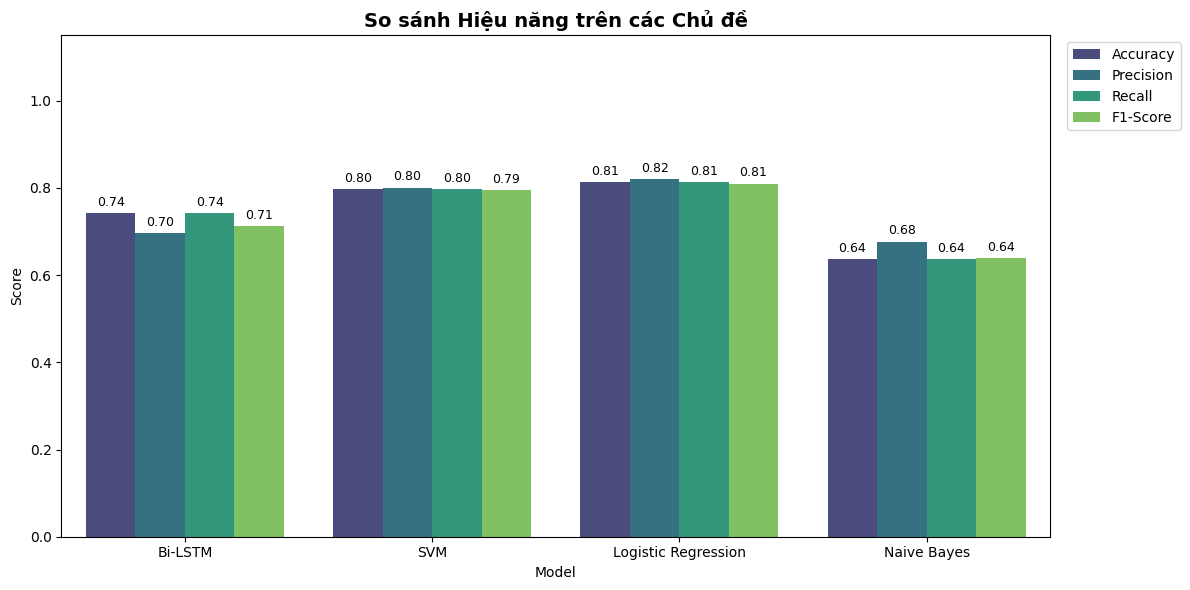

 Đã hoàn tất! Hãy Restart App để thấy kết quả chuẩn.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import re

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical

# Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# ==============================================================================
# 1. CẤU HÌNH & CHUẨN BỊ DỮ LIỆU
# ==============================================================================
print(" BẮT ĐẦU HUẤN LUYỆN MODEL DỰ ĐOÁN CHỦ ĐỀ...")

work_dir = 'data_final'
if not os.path.exists(work_dir): os.makedirs(work_dir)

filename = 'data_final_chinh_xac_100.csv'
possible_paths = [filename, os.path.join(work_dir, filename)]
csv_path = next((p for p in possible_paths if os.path.exists(p)), None)

if csv_path is None: raise FileNotFoundError(f" Không tìm thấy file '{filename}'")

# Load dữ liệu
df = pd.read_csv(csv_path).dropna(subset=['Topic_Label_Final', 'content_cleaned'])

# ------------------------------------------------------------------------------
# ĐỒNG BỘ HÓA LOGIC TRAIN & MAP
# ------------------------------------------------------------------------------

# B1: Tạo Encoder từ cột 7 chủ đề (Topic_Label_Final)
label_encoder = LabelEncoder()
y_integers = label_encoder.fit_transform(df['Topic_Label_Final'])

# B2: Lấy thông tin lớp
num_classes = len(label_encoder.classes_)
print(f" Số lượng chủ đề sẽ Train: {num_classes}")
print(f" Danh sách: {label_encoder.classes_}")

# B3: Tạo Map khớp 100% với Encoder
topic_map = {i: label for i, label in enumerate(label_encoder.classes_)}

# B4: Lưu Map ngay lập tức
with open(os.path.join(work_dir, "topic_map.pkl"), 'wb') as f:
    pickle.dump(topic_map, f)

# ------------------------------------------------------------------------------

# Hàm làm sạch
def standardize_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['final_text'] = df['content_cleaned'].apply(standardize_text)

# Input & Output
X_text = df['final_text'].values
y_onehot = to_categorical(y_integers, num_classes=num_classes)

# Chia Train/Test
X_train_txt, X_test_txt, y_train_int, y_test_int, y_train_hot, y_test_hot = train_test_split(
    X_text, y_integers, y_onehot, test_size=0.2, random_state=42
)

# ==============================================================================
# 2. VECTOR HÓA
# ==============================================================================
print("\n--- BƯỚC VECTOR HÓA ---")
VOCAB_SIZE = 5000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_txt)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_txt), maxlen=MAX_LEN, padding='post', truncating='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test_txt), maxlen=MAX_LEN, padding='post', truncating='post')

X_train_matrix = tokenizer.texts_to_matrix(X_train_txt, mode='tfidf')
X_test_matrix = tokenizer.texts_to_matrix(X_test_txt, mode='tfidf')
print("\n--- ĐÃ VECTOR HÓA XONG ---")

# ==============================================================================
# 3. HUẤN LUYỆN 4 MODEL
# ==============================================================================
results_data = []

def calculate_metrics(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return [model_name, acc, prec, rec, f1]

# --- MODEL 1: BI-LSTM ---
print("\n[1/4] Training Bi-LSTM...")
model = Sequential()
model.add(Embedding(VOCAB_SIZE, 128, input_length=MAX_LEN))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_seq, y_train_hot, epochs=20, batch_size=32, verbose=0,
          validation_data=(X_test_seq, y_test_hot),
          callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

y_pred_dl = np.argmax(model.predict(X_test_seq, verbose=0), axis=1)
results_data.append(calculate_metrics("Bi-LSTM", y_test_int, y_pred_dl))

# --- MODEL 2, 3, 4: ML BASELINES ---
ml_models = {
    "SVM": LinearSVC(dual='auto', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB()
}

for name, clf in ml_models.items():
    print(f"[{len(results_data)+1}/4] Training {name}...")
    clf.fit(X_train_matrix, y_train_int)
    y_pred = clf.predict(X_test_matrix)
    results_data.append(calculate_metrics(name, y_test_int, y_pred))

# ==============================================================================
# 4. LƯU & HIỂN THỊ
# ==============================================================================
# Lưu Model & Tokenizer
model.save(os.path.join(work_dir, "lstm_topic_model.h5"))
with open(os.path.join(work_dir, "tokenizer.pkl"), 'wb') as f: pickle.dump(tokenizer, f)

print("\n=== BẢNG KẾT QUẢ SO SÁNH ===")
cols = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
df_res = pd.DataFrame(results_data, columns=cols)
display(df_res.style.highlight_max(axis=0, color='lightgreen', subset=cols[1:]).format("{:.2%}", subset=cols[1:]))

# Vẽ biểu đồ
df_melt = df_res.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melt, x='Model', y='Score', hue='Metric', palette='viridis')
for container in ax.containers: ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)
plt.title("So sánh Hiệu năng trên các Chủ đề", fontsize=14, fontweight='bold')
plt.ylim(0, 1.15)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

print(" Đã hoàn tất!")

**APP**

In [ ]:
# ==========================================
# BƯỚC 1: CÀI ĐẶT & TẠO FILE APP
# ==========================================
import os

# 1. Cài thư viện
print("⏳ Đang cài đặt thư viện...")
!pip install -q streamlit plotly

# 2. Tải công cụ Cloudflare Tunnel (Giúp public web không cần mật khẩu)
!wget -q -O cloudflared https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared

⏳ Đang cài đặt thư viện...
cloudflared: Text file busy


In [ ]:
# 1. Tạo file app.py
code_app = """
import streamlit as st
import numpy as np
import pandas as pd
import pickle
import os
import re
import plotly.express as px
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cấu hình trang (Layout rộng)
st.set_page_config(page_title="Topic Modeling AI", page_icon="🤖", layout="wide")

# CSS tùy chỉnh để căn giữa tiêu đề và làm đẹp
st.markdown(\"\"\"
    <style>
    .main-title {
        text-align: center;
        font-size: 3em;
        color: #4CAF50;
        margin-bottom: 0px;
    }
    .sub-title {
        text-align: center;
        font-size: 1.2em;
        color: #555;
        margin-bottom: 30px;
    }
    </style>
\"\"\", unsafe_allow_html=True)

# Đường dẫn file
WORK_DIR = 'data_final'
MODEL_PATH = os.path.join(WORK_DIR, "lstm_topic_model.h5")
TOKENIZER_PATH = os.path.join(WORK_DIR, "tokenizer.pkl")
TOPIC_MAP_PATH = os.path.join(WORK_DIR, "topic_map.pkl")
MAX_LEN = 100

# Hàm load tài nguyên
# Tách Model (Nặng -> Cache) và Map (Nhẹ -> Không Cache)
# Để đảm bảo Map luôn đọc mới từ ổ cứng, không lấy từ RAM cũ.

@st.cache_resource
def load_heavy_resources():
    try:
        if not os.path.exists(MODEL_PATH): return None, None
        model = load_model(MODEL_PATH)
        with open(TOKENIZER_PATH, 'rb') as f: tokenizer = pickle.load(f)
        return model, tokenizer
    except Exception as e:
        return None, None

def load_topic_map():
    try:
        # Load trực tiếp mỗi lần chạy, không cache
        with open(TOPIC_MAP_PATH, 'rb') as f: topic_map = pickle.load(f)
        return topic_map
    except:
        return {}

model, tokenizer = load_heavy_resources()
topic_map = load_topic_map()

# Hàm xử lý text
def standardize_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\\w\\s]', ' ', text)
    text = re.sub(r'\\s+', ' ', text).strip()
    return text

def predict_topic(text):
    clean_text = standardize_text(text)
    seq = tokenizer.texts_to_sequences([clean_text])
    padded = pad_sequences(seq, maxlen=MAX_LEN, padding='post', truncating='post')

    probs = model.predict(padded)[0]
    max_idx = np.argmax(probs)

    results = []
    for idx, prob in enumerate(probs):
        t_name = topic_map.get(idx, f"Cluster {idx}")
        results.append({"Chủ đề": t_name, "Xác suất": prob})

    df_res = pd.DataFrame(results).sort_values("Xác suất", ascending=False)
    return topic_map.get(max_idx, "Unknown"), probs[max_idx], df_res

# --- GIAO DIỆN ---
st.markdown('<p class="main-title">🤖 PHÂN TÍCH CHỦ ĐỀ VĂN BẢN</p>', unsafe_allow_html=True)
st.markdown('<p class="sub-title">Hệ thống AI tự động phân loại ý kiến khách hàng</p>', unsafe_allow_html=True)

if model is None:
    st.error("⚠️ KHÔNG TÌM THẤY FILE DATA! Hãy đảm bảo bạn đã chạy code Train Model.")
else:
    # 1. PHẦN NHẬP LIỆU
    # Chia làm 3 cột: [Trống] - [Nội dung chính] - [Trống]
    col_l, col_center, col_r = st.columns([1, 2, 1])

    with col_center:
        user_input = st.text_area("Nhập bình luận của bạn vào đây:", height=150, placeholder="Ví dụ: Pin dùng rất lâu nhưng chụp đêm hơi mờ...")
        # Nút bấm căn giữa (trick dùng columns con)
        c1, c2, c3 = st.columns([1, 1, 1])
        with c2:
            analyze_btn = st.button("🔍 Phân tích ngay", type="primary", use_container_width=True)

    # 2. PHẦN KẾT QUẢ
    if analyze_btn and user_input:
        st.markdown("---") # Đường kẻ ngang phân cách

        top_topic, conf, df_res = predict_topic(user_input)

        # Hiển thị kết quả tóm tắt
        res_col1, res_col2, res_col3 = st.columns([1, 2, 1])
        with res_col2:
            st.success(f"🎯 **Chủ đề chính:** {top_topic}")
            st.info(f"⚡ **Độ tin cậy:** {conf:.2%}")

        # 3. BIỂU ĐỒ (FULL WIDTH hoặc CĂN GIỮA)
        st.subheader("📊 Biểu đồ Phân bố Xác suất")

        # Vẽ biểu đồ
        fig = px.bar(df_res.head(5),
                     x="Xác suất",
                     y="Chủ đề",
                     orientation='h',
                     text_auto='.1%', # Số % tự động hiển thị
                     color="Xác suất",
                     color_continuous_scale='Teal')

        fig.update_layout(
            height=400,
            yaxis={
                'categoryorder': 'total ascending', # Sắp xếp tăng dần
                'automargin': True,                 # Tự động đẩy lề trái để ko đè chữ
                'title': None,                      # Bỏ chữ 'Chủ đề' cho gọn
            },
            xaxis={
                'title': 'Mức độ phù hợp',
                'showgrid': True,
                'gridcolor': '#eee'
            },
            # Cấu hình lề để chữ dài ko bị cắt
            margin=dict(l=150, r=50, t=30, b=50),

            # Font chữ to rõ
            font=dict(size=14)
        )

        # Đẩy số ra ngoài thanh nếu thanh quá ngắn (giúp số ko đè lên thanh)
        fig.update_traces(textposition='outside', cliponaxis=False)

        st.plotly_chart(fig, use_container_width=True)

        # Bảng chi tiết (ẩn/hiện)
        with st.expander("Xem bảng số liệu chi tiết"):
            st.dataframe(df_res, use_container_width=True)
"""

with open("app.py", "w") as f:
    f.write(code_app)

# ==========================================
# BƯỚC 3: CHẠY APP & TẠO LINK
# ==========================================
import subprocess
import time
import re

print(" Đang khởi động Streamlit...")
subprocess.Popen(["streamlit", "run", "app.py"])

print(" Đang tạo đường hầm Cloudflare...")
process = subprocess.Popen(["./cloudflared", "tunnel", "--url", "http://localhost:8501"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

time.sleep(5)
found_url = False
for _ in range(10):
    line = process.stderr.readline().decode('utf-8')
    if "trycloudflare.com" in line:
        url = re.search(r'https://.*\.trycloudflare\.com', line)
        if url:
            final_link = url.group(0)
            print("\n" + "="*50)
            print(f" APP ĐÃ CẬP NHẬT! BẤM VÀO LINK DƯỚI:")
            print(f" {final_link}")
            print("="*50 + "\n")
            found_url = True
            break

if not found_url:
    print(" Chưa bắt được link. Hãy chạy lại cell này.")
    while True:
        line = process.stderr.readline().decode('utf-8')
        if not line: break
        if "trycloudflare.com" in line:
            print(f" Link: {re.search(r'https://.*\.trycloudflare\.com', line).group(0)}")
            break

 Đang khởi động Streamlit...
 Đang tạo đường hầm Cloudflare...

 APP ĐÃ CẬP NHẬT! BẤM VÀO LINK DƯỚI:
 https://acre-aid-definitions-rob.trycloudflare.com

